In [16]:
from impedance import preprocessing
import pandas as pd
import os
import numpy as np
from CircuitModel import chi2, show_parameters
import pandas as pd
from IPython.display import display, HTML
data_path = os.path.join("wyniki", "1.txt")

data = pd.read_csv(data_path, sep="\t", header=None)


frequencies, Z = data.iloc[:,0,], data.iloc[:,1] - 1j*data.iloc[:,2]
# frequencies, Z = data.iloc[:,0], data.iloc[:,1] + 1j*data.iloc[:,2]

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [17]:
frequencies

0     4501.43950
1     3064.02150
2     2085.67090
3     1419.54420
4      965.93054
5      657.68512
6      447.56531
7      304.70715
8      207.45621
9      141.21979
10      96.13857
11      65.43979
12      44.52974
13      30.32021
14      20.64072
15      14.04285
16       9.56245
17       6.51041
18       4.42886
19       3.01408
20       2.05214
21       1.39759
22       0.95072
23       0.64737
24       0.44079
25       0.29994
Name: 0, dtype: float64

In [18]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(C1,R1)-p(C2,R2)'
initial_guess = [100, .01, 100, .01, 900]

circuit_model = CustomCircuit(circuit, initial_guess=initial_guess)

In [19]:
fitted_model = circuit_model.fit(frequencies, Z, method='trf')

In [44]:
circuit_model.parameters_
show_parameters(circuit_model)

Circuit Parameters:
R0    | 123.751
C1    | 3.08903e-06
R1    | 10715.8
C2    | 9.53826e-07
R2    | 419.062



In [22]:
circuit_model.get_param_names()

(['R0', 'C1', 'R1', 'C2', 'R2'], ['Ohm', 'F', 'Ohm', 'F', 'Ohm'])

In [23]:
circuit_model.parameters_

array([1.23751345e+02, 3.08902920e-06, 1.07158359e+04, 9.53826389e-07,
       4.19062437e+02])

In [24]:
Z_fit = circuit_model.predict(frequencies)

In [25]:
Z

0       124.56231-   45.46629j
1       128.95544-   72.14854j
2       130.50612-  104.44491j
3       155.01424-  151.33224j
4       185.35851-  205.93224j
5       232.11295-  258.13510j
6       310.30026-  314.52304j
7       387.84357-  358.52518j
8       452.32159-  409.84595j
9       499.78836-  483.63559j
10      539.25354-  624.20563j
11      582.05347-  849.83502j
12      644.48431- 1182.12740j
13      791.45233- 1694.93910j
14     1094.68260- 2405.43990j
15     1673.14990- 3319.18160j
16     2771.44410- 4307.26320j
17     4364.82370- 5111.04740j
18     6353.76860- 5281.30620j
19     8206.52050- 4824.18900j
20     9570.87890- 3895.20120j
21    10400.95800- 2913.38260j
22    10856.95600- 2077.48460j
23    11065.46500- 1438.41410j
24    11197.27300- 1015.27070j
25    11226.75400-  687.89911j
dtype: complex128

In [26]:
Z_fit

array([  127.01695344  -48.22604382j,   130.73704511  -70.36861463j,
         138.54445899 -101.89252127j,   154.43993282 -145.26569196j,
         184.88270673 -200.99339074j,   236.72447152 -263.99332834j,
         310.12857507 -323.21109362j,   390.70693825 -371.2968274j ,
         459.09525961 -419.94448834j,   508.39707131 -496.43918977j,
         546.46479757 -630.19200608j,   589.32934857 -850.16303769j,
         661.12844687-1189.99194684j,   803.25497596-1689.32763568j,
        1093.22433028-2389.35510534j,  1666.68485267-3298.74354986j,
        2705.01334222-4310.78064504j,  4324.58617001-5127.72924291j,
        6339.87992953-5344.54714008j,  8235.55697969-4825.59501108j,
        9607.37250881-3871.01178395j, 10423.78160902-2873.62297118j,
       10855.43806772-2040.15382063j, 11067.84585764-1417.79268784j,
       11169.33698573 -974.67010334j, 11217.10966204 -666.20425833j])

In [27]:
# Calculate chi-squared for our current fit
chi2_value = chi2(Z, Z_fit)
print(f"Chi-squared value: {chi2_value:.2f}")

Chi-squared value: 22410.23


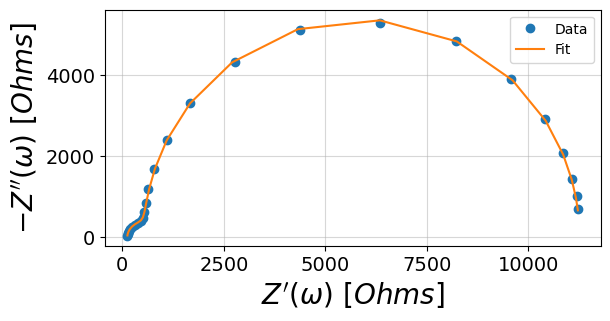

In [28]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=1, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=1, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()